## Notebook for Linear Regression predictions, testing and validation
1. We will try plain ol' linear regression, Ridge regression and Lasso Regression
2. Cross Validation for each
3. Testing Validation against baselines
4. Conclusions

In [59]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os
from datetime import datetime

#### Load our data

In [63]:
dateparse = lambda dates: [datetime.strptime(d, "%Y/%m/%d %H:%M") for d in dates]

cwd = os.getcwd()
path = f"{cwd}/Data2017/preprocessed"
all_files = glob.glob(path + "/*.csv")
df = pd.DataFrame()
cur_df : pd.DataFrame
# for file in all_files:
#     cur_df = pd.read_csv(file)
#     df = df.append(cur_df, ignore_index=True)
df = pd.read_csv(f"{path}/Jan.csv", parse_dates=["datetime"], date_parser=dateparse)

print(df.head())


             datetime  direction  volume
0 2017-01-01 00:00:00          0     451
1 2017-01-01 01:00:00          0     652
2 2017-01-01 02:00:00          0     527
3 2017-01-01 03:00:00          0     462
4 2017-01-01 04:00:00          0     514


In [40]:
from sklearn.model_selection import train_test_split

# Hold out a validation set for later
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=False)

In [41]:
y_val.shape

(3504,)

### Linear Regression
Cross Validate to find best polynomial order

In [42]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

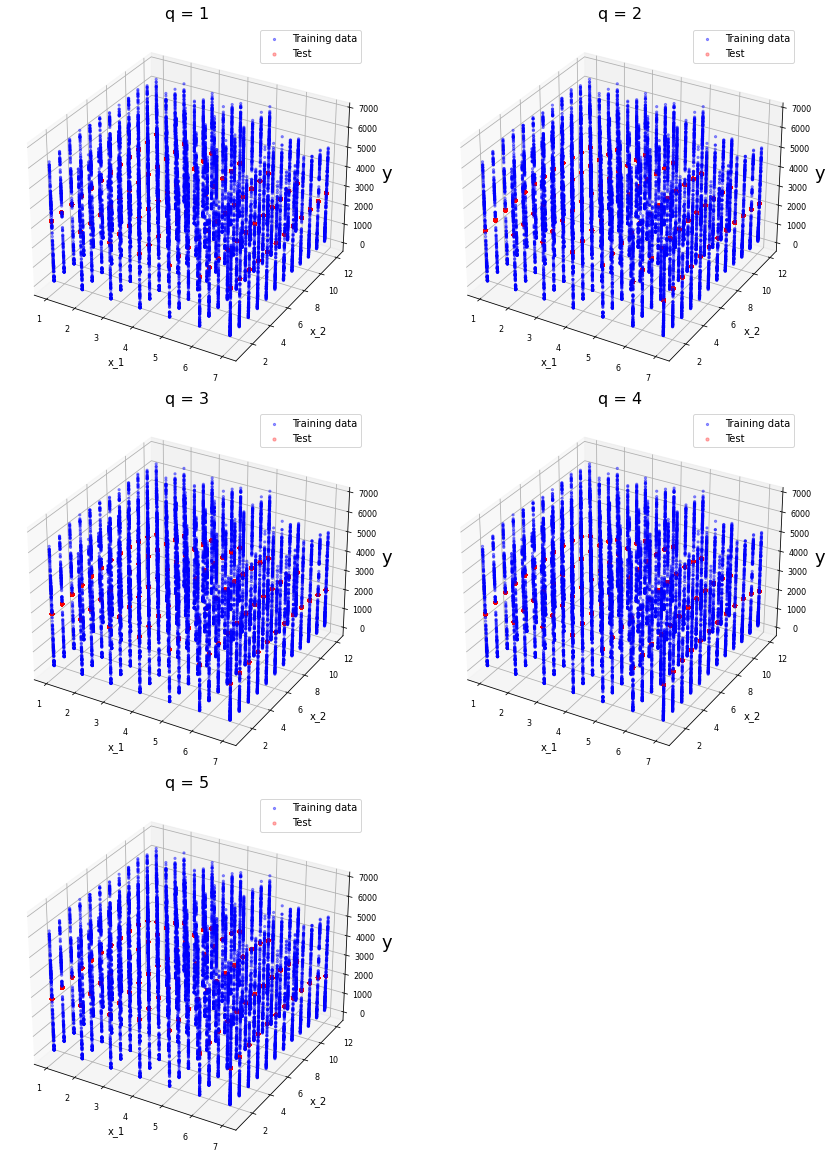

(1.0, 5.0)

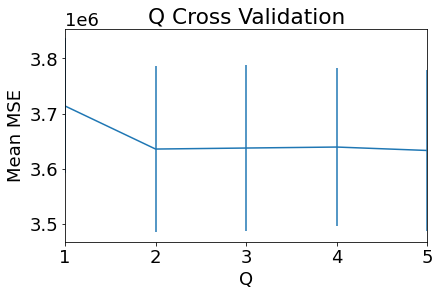

In [43]:
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True

kf = KFold(n_splits=5)

# Specify our polynomial and Ci range
poly_range = [1,2,3,4,5]


mean_mse = []
std_mse = []
fig = plt.figure(figsize=(12, 16))
# plt.title("Cross Validation for Polynomial orders")

for i,q in enumerate(poly_range):

    i += 1

    Xpoly = PolynomialFeatures(q).fit_transform(X)

    model=LinearRegression()
    temp_mse = []

    plotted = False

    for train, test in kf.split(Xpoly):
        model.fit(Xpoly[train], y[train])
        ypred = model.predict(Xpoly[test])
        temp_mse.append(mean_squared_error(y[test], ypred))

        # Plot data for each ci value
        if not plotted:

            ax = fig.add_subplot(3,2,i, projection="3d")
            ax.scatter(X1, X2, y, color='blue', label='Training data', s=5, alpha = 0.4) # Training data
            ypred = model.predict(Xpoly)
            ax.scatter(X1, X2, ypred, color='red', label='Test', alpha = 0.3, s=10)  # Make this a trisurf?
            plt.xlabel("x_1", fontsize=10)
            plt.ylabel("x_2", fontsize=10)
            ax.set_zlabel("y")
            ax.set_title(f'q = {q}', fontsize=16)
            ax.legend(fontsize=10)
            ax.tick_params(axis='x', labelsize=8)
            ax.tick_params(axis='y', labelsize=8)
            ax.tick_params(axis='z', labelsize=8)

            # plt.show()
            plotted = True
    mean_mse.append(np.array(temp_mse).mean())
    std_mse.append(np.array(temp_mse).std())


plt.show()

plt.errorbar(poly_range, mean_mse, yerr=std_mse)
plt.title("Q Cross Validation")
plt.xlabel("Q")
plt.ylabel("Mean MSE")
plt.xlim((1,5))


#### Evaluate our performance using the best polynomial order, against a couple baselines

In [44]:
from sklearn.dummy import DummyRegressor

X_train_poly = PolynomialFeatures(2).fit_transform(X_train)
X_val_poly = PolynomialFeatures(2).fit_transform(X_val)
linear_model = LinearRegression().fit(X_train_poly, y_train)
ypred_linear = linear_model.predict(X_val_poly)

# Dummy Regressors
dummy_mean = DummyRegressor(strategy="mean").fit(X_train, y_train)
dummy_median = DummyRegressor(strategy="median").fit(X_train, y_train)
y_dummy_mean_pred = dummy_mean.predict(X_val)
y_dummy_median_pred = dummy_median.predict(X_val)

square error 3744199.1198682627 3841124.8603264773, 3853842.4517694064


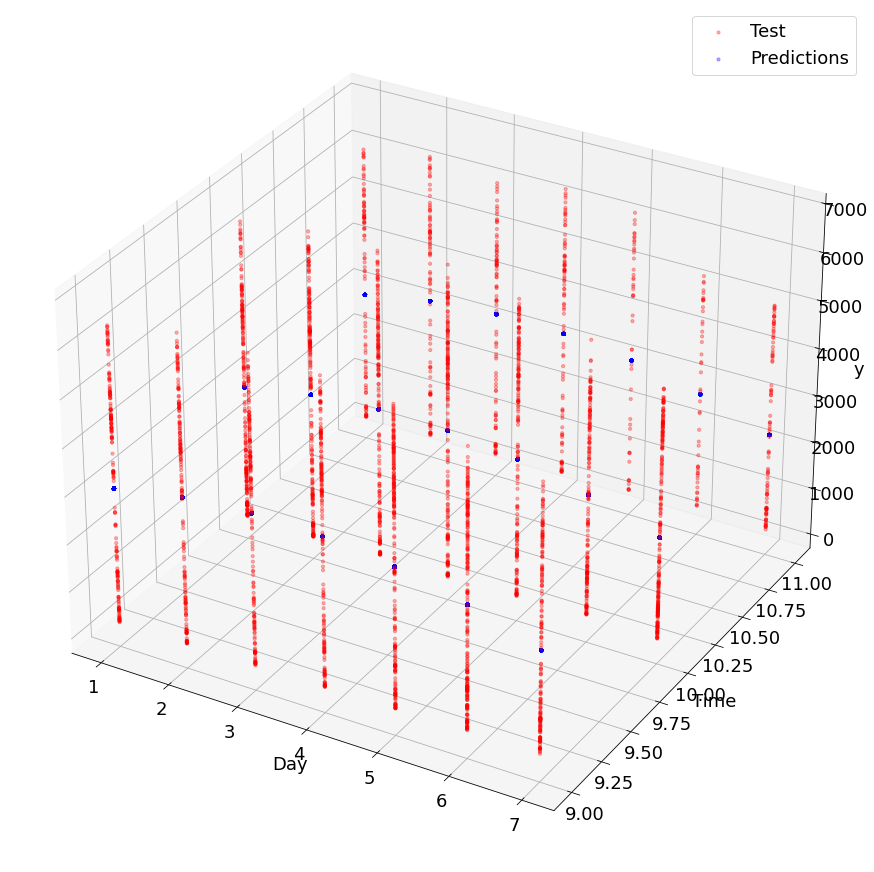

In [45]:
df = pd.DataFrame(X_val)
X1 = df.iloc[:,0]   # Input feature 1
X2 = df.iloc[:,1]  # Input feature 2

print(f"square error {(mean_squared_error(y_val,ypred_linear))} {(mean_squared_error(y_val,y_dummy_mean_pred))}, {(mean_squared_error(y_val,y_dummy_median_pred))}")
fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection="3d")


ax.scatter(X1, X2, y_val, color='red', label='Test', alpha = 0.3, s=10)
ax.scatter(X1, X2, ypred_linear, color='blue', label='Predictions', alpha = 0.3, s=10)
ax.legend()
ax.set_zlabel("y")
plt.xlabel("Day")
plt.ylabel("Time")


plt.show()



In [36]:
X2.shape

(3504,)